In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
# from lmphoton.simulation import current_simulation as sim
import pandas as pd

import sys
sys.path.append("../")

# SPPD optical elements
from src.sppd_clm_optics import SPPDCLMOPTICS, SPPDCLMOPTICS_LAMBDA_AB

# PMIC drivers
from src.pikeriver_pmic import PMIC
from src.laser_control.pid import pid as PID
# Calibration and control
from src.sppd_clm import CONTROLLER

plt.style.use("plot_style.mplstyle")
warnings.filterwarnings("ignore")

In [2]:
psi_matrix = pd.read_csv("../src/sppd_pic_psi_matrix.csv")
psi_array = psi_matrix.to_numpy()

In [3]:
psi_array @ np.ones(16)/16

array([2.59544712, 2.69600188, 2.75479684, 2.79766596, 2.83007909,
       2.853715  , 2.86925128, 2.87695578, 2.87695574, 2.86925132,
       2.85371496, 2.83007533, 2.79766023, 2.75479998, 2.69591065,
       2.59747951])

In [4]:
l1 = np.zeros(16)
l1[0] = 1
psi_array @ l1

array([21.51097509,  5.18068188,  3.59558395,  2.77738439,  2.20112626,
        1.74277203,  1.37261948,  1.07132833,  0.82501159,  0.62345302,
        0.45912196,  0.32673606,  0.22256461,  0.14362938,  0.08860502,
        0.06831928])

In [5]:
delta_current = 0.075
wpe = 0.18
current = 0.125

optical_power = 0.03
electrical_power  = optical_power/wpe

lost_power = electrical_power - optical_power
lost_power

0.13666666666666666

In [6]:
l1 = np.zeros(16)
l1[0] = lost_power
delta_T = psi_array @ l1
delta_nm_T = delta_T * 0.1e-9
delta_nm_current = 1/17*0.1e-9*delta_current*1e3

print(delta_T)
print(delta_nm_T/1e-9)
print(delta_nm_current/1e-9)

[2.93983326 0.70802652 0.49139647 0.37957587 0.30082059 0.23817884
 0.18759133 0.14641487 0.11275158 0.08520525 0.06274667 0.04465393
 0.03041716 0.01962935 0.01210935 0.00933697]
[0.29398333 0.07080265 0.04913965 0.03795759 0.03008206 0.02381788
 0.01875913 0.01464149 0.01127516 0.00852052 0.00627467 0.00446539
 0.00304172 0.00196293 0.00121094 0.0009337 ]
0.4411764705882352


In [7]:
l1 = np.ones(16) * lost_power
delta_T = psi_array @ l1
delta_nm_T = delta_T * 0.1e-9
delta_nm_current = 1/17 * 0.1e-9 * delta_current * 1e3

print(delta_T)
print(delta_nm_T/1e-9)
print(delta_nm_current/1e-9)
print(delta_current)

[5.67537771 5.89525745 6.02382242 6.1175629  6.18843961 6.24012346
 6.27409614 6.2909433  6.29094322 6.27409622 6.24012338 6.18843139
 6.11755037 6.02382929 5.89505796 5.67982187]
[0.56753777 0.58952574 0.60238224 0.61175629 0.61884396 0.62401235
 0.62740961 0.62909433 0.62909432 0.62740962 0.62401234 0.61884314
 0.61175504 0.60238293 0.5895058  0.56798219]
0.4411764705882352
0.075


In [8]:
l1 = np.ones(16) * lost_power
delta_T = 5 * np.sum(l1)
delta_nm_T = delta_T * 0.1e-9
delta_nm_current = 1/17 * 0.1e-9 * delta_current * 1e3

print(delta_T)
print(delta_nm_T/1e-9)
print(delta_nm_current/1e-9)
print(delta_current)

10.933333333333334
1.0933333333333335
0.4411764705882352
0.075


In [9]:
target_grid_array = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9 

wavelength_fabrication = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9

In [10]:
delta_wavelength = np.array([-0.10705344,  0.00190791,  0.05480012, -0.15248436, -0.03135676, -0.11447367, -0.04861347, -0.00903565, -0.01401615, -0.0605029,   0.07074475,  0.05631292, 0.06570936, -0.02390955,  0.04250154, -0.01701942]) * 1e-9

In [11]:
wavelength_2 = delta_wavelength + wavelength_fabrication
print(wavelength_2*1e9)
print(target_grid_array*1e9)

[1301.36294656 1302.60190791 1303.78480012 1304.71751564 1305.97864324
 1307.02552633 1308.23138653 1309.42096435 1310.55598385 1311.6594971
 1312.94074475 1314.07631292 1315.23570936 1316.30609045 1317.52250154
 1318.62298058]
[1301.47 1302.6  1303.73 1304.87 1306.01 1307.14 1308.28 1309.43 1310.57
 1311.72 1312.87 1314.02 1315.17 1316.33 1317.48 1318.64]


In [12]:
wavelength_3 = np.array([1.30147088e-06, 1.30253850e-06, 1.30379270e-06, 1.30481599e-06,
       1.30594969e-06, 1.30722621e-06, 1.30848463e-06, 1.30937937e-06,
       1.31034526e-06, 1.31174378e-06, 1.31294002e-06, 1.31405311e-06,
       1.31518467e-06, 1.31637013e-06, 1.31760369e-06, 1.31863334e-06])

In [13]:
wavelength_4 = np.array([1.30150695e-06, 1.30266500e-06, 1.30381006e-06, 1.30500515e-06,
       1.30605274e-06, 1.30707336e-06, 1.30832819e-06, 1.30946877e-06,
       1.31060618e-06, 1.31173168e-06, 1.31281666e-06, 1.31414471e-06,
       1.31525203e-06, 1.31619448e-06, 1.31740494e-06, 1.31861709e-06]) - 0.5e-9

In [14]:
wavelength_4

array([1.30100695e-06, 1.30216500e-06, 1.30331006e-06, 1.30450515e-06,
       1.30555274e-06, 1.30657336e-06, 1.30782819e-06, 1.30896877e-06,
       1.31010618e-06, 1.31123168e-06, 1.31231666e-06, 1.31364471e-06,
       1.31475203e-06, 1.31569448e-06, 1.31690494e-06, 1.31811709e-06])

In [15]:
target_grid_array = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9 

wavelength_fabrication = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9

_sppd_clm_optics = SPPDCLMOPTICS_LAMBDA_AB(
  current = 0.133,
  target_grid_array = target_grid_array,
  wavelength_fabrication= wavelength_4,
  nominal_junction_temperature=273+44.5,
  bw_lambda = 0.2e-9,
  name = "SPPDCLMOPTICS",
  no_mux = 1
  )

print("Wavelength fabrication")
print(_sppd_clm_optics._sppd_clm_pic._lambda_array*1e9)
print("\nCase temperature")
print(_sppd_clm_optics._temperature-273)
current_array = np.ones(16) * 0.133
_sppd_clm_optics.update(tc = 273+42.5, i_array=current_array)
print("\nWavelength after update")
print(_sppd_clm_optics._lambda_array*1e9)
print("\nTarget wavelength ideal")
print(_sppd_clm_optics._target_grid_array*1e9)

print("\n Current array")
print(_sppd_clm_optics._sppd_clm_pic_mpd_current_array)


Wavelength fabrication
[1301.00695 1302.165   1303.31006 1304.50515 1305.55274 1306.57336
 1307.82819 1308.96877 1310.10618 1311.23168 1312.31666 1313.64471
 1314.75203 1315.69448 1316.90494 1318.11709]

Case temperature
44.5

Wavelength after update
[1301.46087374 1302.64425855 1303.80413196 1305.01002284 1306.06577934
 1307.09235442 1308.35109879 1309.49361994 1310.63102993 1311.7545888
 1312.83565441 1314.1577484  1315.2569014  1316.18855275 1317.38417556
 1318.5715258 ]

Target wavelength ideal
[1301.47 1302.6  1303.73 1304.87 1306.01 1307.14 1308.28 1309.43 1310.57
 1311.72 1312.87 1314.02 1315.17 1316.33 1317.48 1318.64]

 Current array
[0.00031557 0.00031557 0.00031557 0.00031557 0.00031557 0.00031557
 0.00031557 0.00031557 0.00031557 0.00031557 0.00031557 0.00031557
 0.00031557 0.00031557 0.00031557 0.00031557]


Calibration time: 12.42 s
Laser TEC temp 0: 41.80 C, Laser Junction temp 0: 50.39 C, Enablence MPD current 0: 280.00, Pout 0: 17.63 mW, Lambda 0: 1301.60 nm, Drive current 0: 154.33 mA
Laser TEC temp 1: 42.20 C, Laser Junction temp 1: 50.76 C, Enablence MPD current 1: 311.00, Pout 1: 17.70 mW, Lambda 1: 1302.79 nm, Drive current 1: 155.99 mA
Laser TEC temp 2: 42.10 C, Laser Junction temp 2: 50.98 C, Enablence MPD current 2: 302.00, Pout 2: 17.52 mW, Lambda 2: 1303.96 nm, Drive current 2: 156.94 mA
Laser TEC temp 3: 41.50 C, Laser Junction temp 3: 51.18 C, Enablence MPD current 3: 338.00, Pout 3: 16.27 mW, Lambda 3: 1305.17 nm, Drive current 3: 158.37 mA
Laser TEC temp 4: 41.40 C, Laser Junction temp 4: 51.31 C, Enablence MPD current 4: 357.00, Pout 4: 18.99 mW, Lambda 4: 1306.23 nm, Drive current 4: 159.32 mA
Laser TEC temp 5: 43.20 C, Laser Junction temp 5: 51.36 C, Enablence MPD current 5: 266.00, Pout 5: 19.66 mW, Lambda 5: 1307.26 nm, Drive current 5: 157.85 mA
Laser TEC temp 6: 41

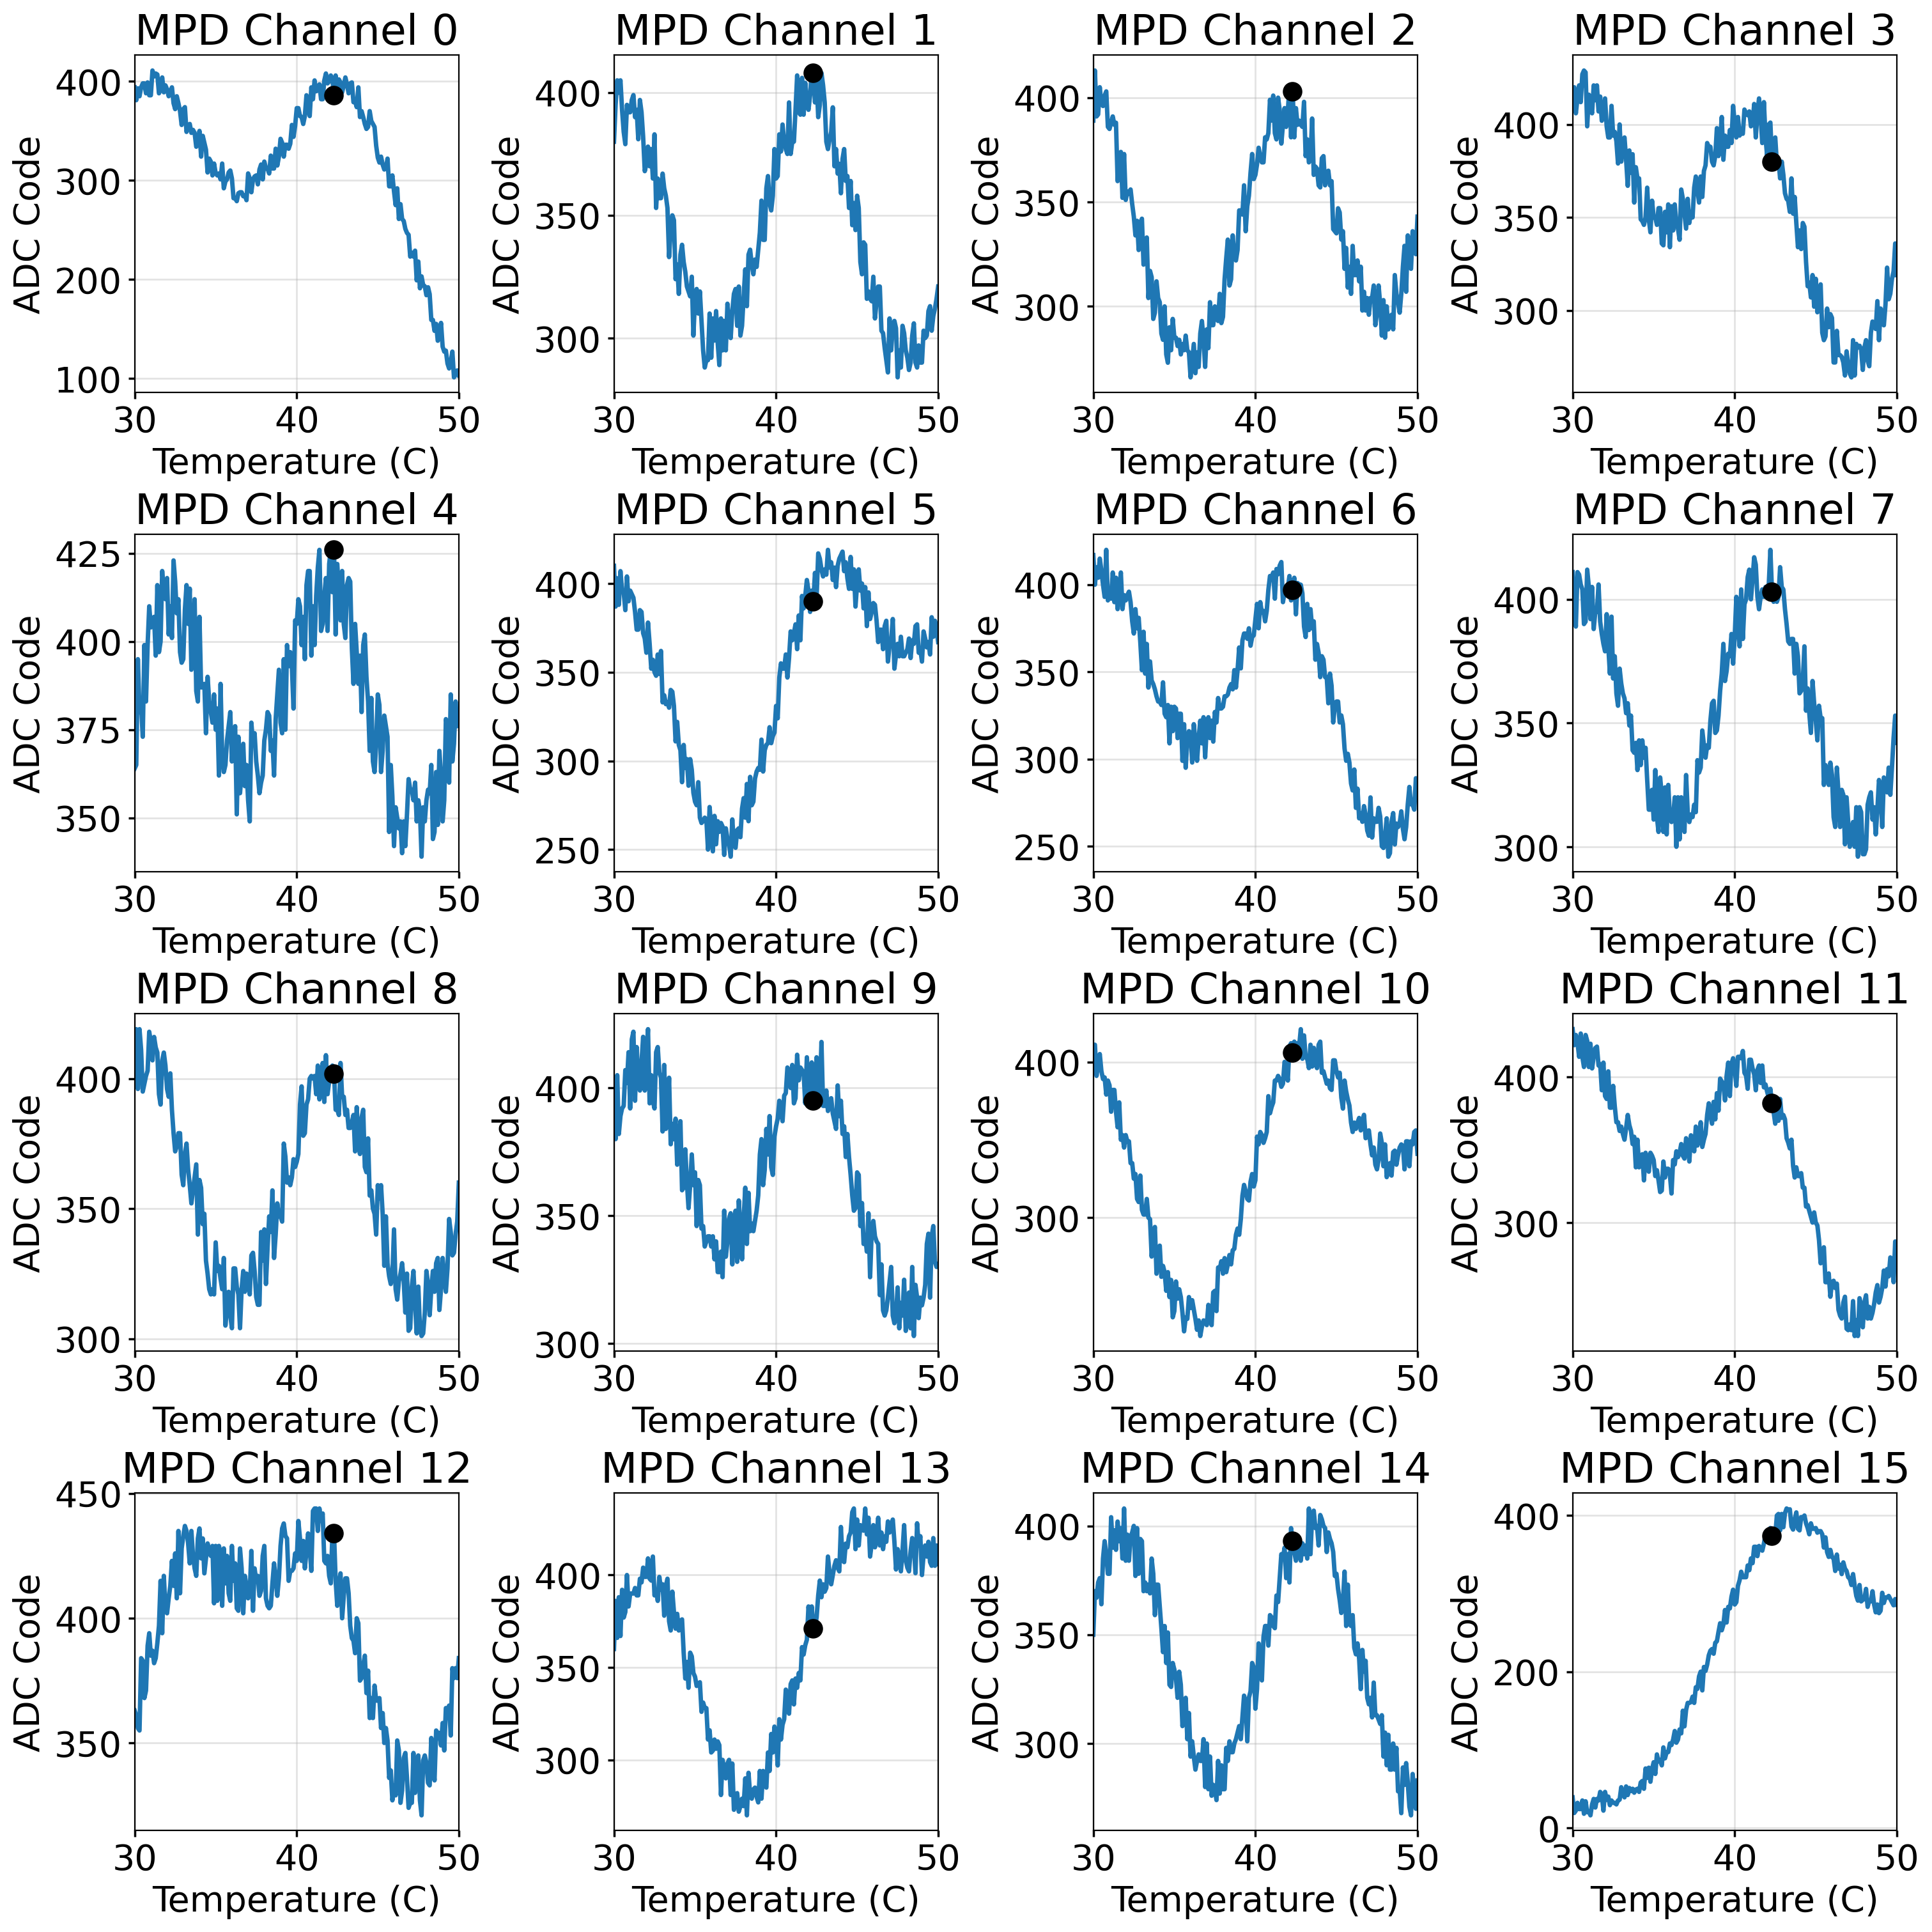

In [16]:
_pk_pmic = PMIC()

dt = 100e-3
_pid_tec = pid_tec = PID(kp=0.5, ki=10*dt, kd=10*dt, dt=dt, umax=3, umin=-3)
_pid_idrive = [PID(kp=1/1000, ki=1/1000, kd=1/1000, dt=dt, umax = 1024, umin=-1024) for __ in range(len(wavelength_fabrication))]

controller = CONTROLLER(
  sppd_clm_optics = _sppd_clm_optics,
  pmic = _pk_pmic,
  drive_current_array=current_array,
  pid_tec = _pid_tec,
  pid_idrive = _pid_idrive,
  dt = dt
)
start = time.time()
controller.calibrate(tc=273+35,
            temperature_array = np.linspace(30, 50, 201)+273, 
            drive_current_array= np.linspace(0.1, 0.2, 101),
            power_wavelength_calibration=True,
            tec_temperature_tuning=True,
            drive_current_tuning=True,
            percent_range = np.linspace(0.8, 1.2, 101)
            )
print(f"Calibration time: {time.time()-start:0.2f} s")

nom_temp_array = controller._nominal_temperature_array
tec_set_point_temperature = controller._tec_set_point_temperature
mux_current_array = controller._pmic_adc_enablence_mux_mpd_current_array
peak_current_array = controller._pmic_adc_enablence_mux_mpd_peak_current_array
output_power_array = controller._enablence_output_power_array
output_lambda_array = controller._lambda_array
current_array = controller._drive_current_array
cal_temperature_array = controller._temperature_array
drive_current_array = controller._pmic._dac_laser_drive_current_array
laser_junction_temperature_array = controller._laser_junction_temperature_array

for idd_laser in range(16):
  print(f"Laser TEC temp {idd_laser}: {nom_temp_array[idd_laser]-273:0.2f} C, Laser Junction temp {idd_laser}: {laser_junction_temperature_array[idd_laser]-273:0.2f} C, Enablence MPD current {idd_laser}: {peak_current_array[idd_laser]:0.2f}, Pout {idd_laser}: {output_power_array[idd_laser]*1e3:0.2f} mW, Lambda {idd_laser}: {output_lambda_array[idd_laser]*1e9:0.2f} nm, Drive current {idd_laser}: {drive_current_array[idd_laser]*1e3:0.2f} mA")
print(f"TEC set point temperature: {tec_set_point_temperature-273:0.2f} C")

# Plot calibration per MUX channel (columns) and temperature (rows)
n_mpd_channels = len(target_grid_array)
# Set font size small
plt.rc('font', size=6)
fig, ax = plt.subplots(int(np.sqrt(n_mpd_channels)), int(np.sqrt(n_mpd_channels)), figsize=(15, 15))
for idd_mpd_channel in range(n_mpd_channels):
  _ax = ax[int(idd_mpd_channel/np.sqrt(n_mpd_channels)), int(idd_mpd_channel%np.sqrt(n_mpd_channels))]
  _ax.plot(cal_temperature_array-273, mux_current_array[:, idd_mpd_channel])
  idd_tec_temp = np.argmin(np.abs(cal_temperature_array - tec_set_point_temperature))
  _ax.plot(tec_set_point_temperature-273, mux_current_array[idd_tec_temp, idd_mpd_channel], 'o', color='k')
  _ax.set_xlim([30,50])
  _ax.set_xlabel("Temperature (C)")
  _ax.set_ylabel("ADC Code")
  _ax.set_title(f"MPD Channel {idd_mpd_channel}")

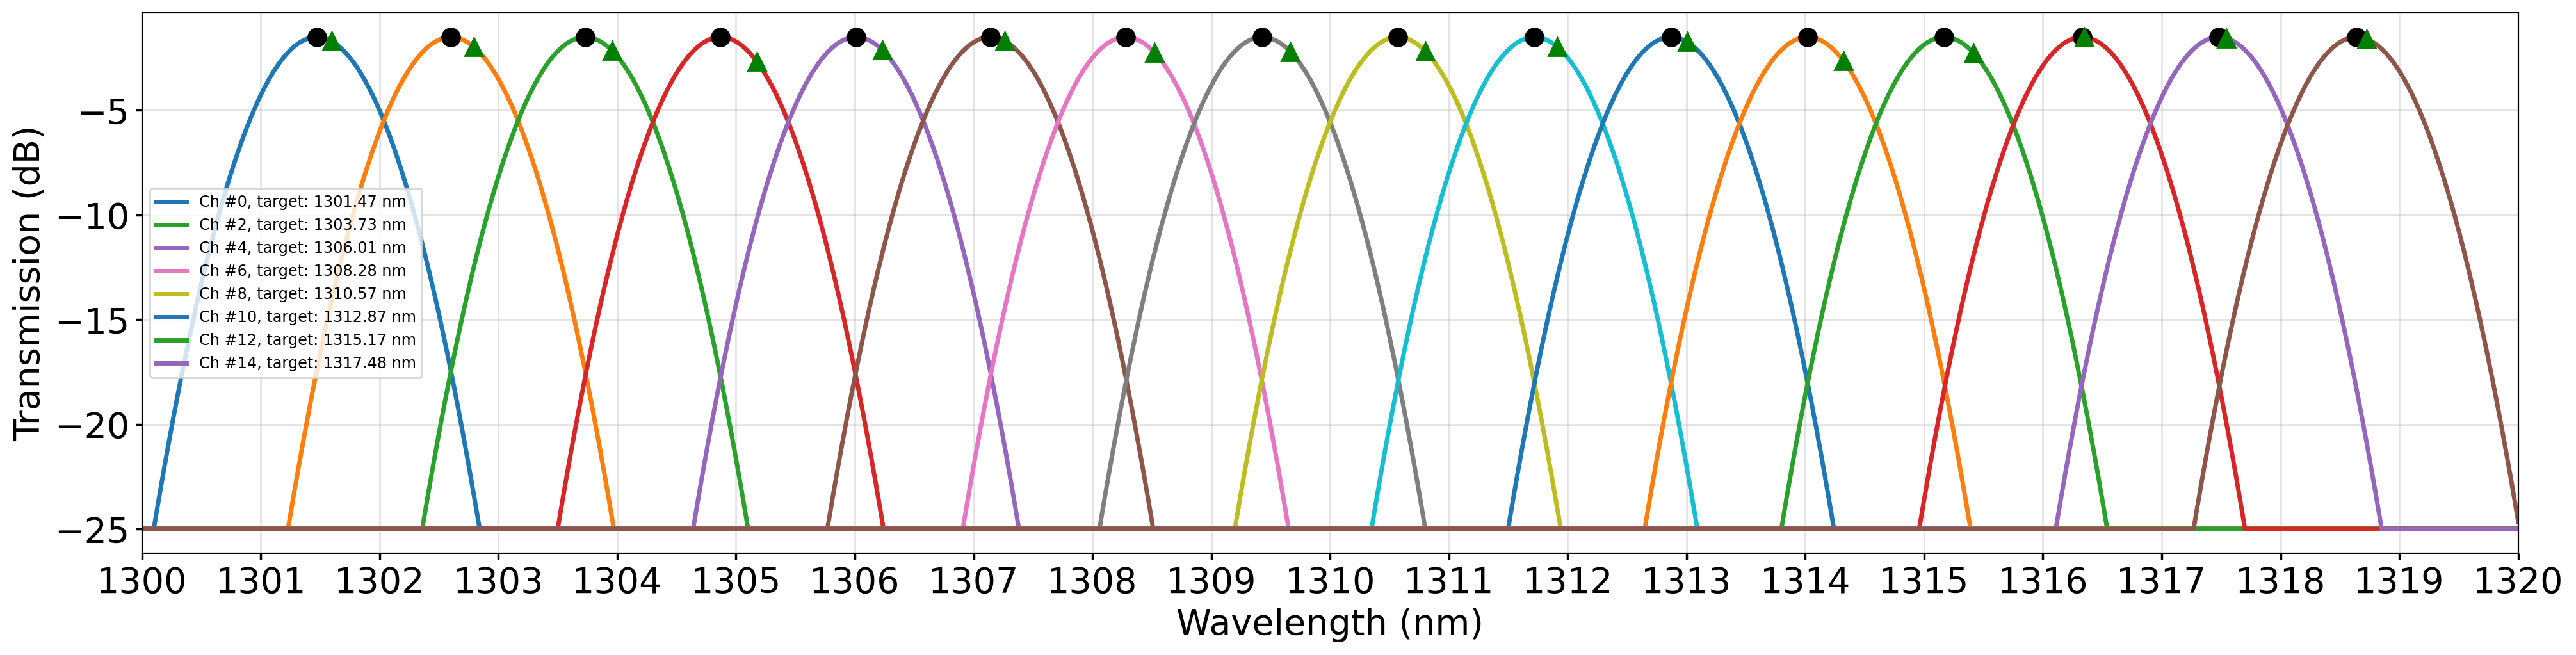

In [17]:
_enablence_mux = _sppd_clm_optics._ebmux

wavelength_fabrication_arg = [np.argmin(np.abs(_enablence_mux.lambda_sweep - wavelength_fabrication[idd_target])) for idd_target in range(len(target_grid_array))]
wavelength_2_arg = [np.argmin(np.abs(_enablence_mux.lambda_sweep - wavelength_2[idd_target])) for idd_target in range(len(target_grid_array))]
wavelength_3_arg = [np.argmin(np.abs(_enablence_mux.lambda_sweep - wavelength_3[idd_target])) for idd_target in range(len(target_grid_array))]
wavelength_4_arg = [np.argmin(np.abs(_enablence_mux.lambda_sweep - output_lambda_array[idd_target])) for idd_target in range(len(target_grid_array))]

plt.figure(figsize=(20,5))
for idd_target in range(len(target_grid_array)):
  if idd_target%2 == 0:
    plt.plot(_enablence_mux.lambda_sweep*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,:]), label="Ch #{:0.0f}, target: {:.2f} nm".format(idd_target, target_grid_array[idd_target]*1e9)) 
  else:
    plt.plot(_enablence_mux.lambda_sweep*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,:])) 

  plt.plot(wavelength_fabrication[idd_target]*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,wavelength_fabrication_arg[idd_target]]), "o", color='k')
  # plt.plot(wavelength_2[idd_target]*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,wavelength_2_arg[idd_target]]), "x", color='b')
  # plt.plot(wavelength_3[idd_target]*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,wavelength_3_arg[idd_target]]), "<", color='r')
  plt.plot(output_lambda_array[idd_target]*1e9, 10*np.log10(_enablence_mux.enablence_mux_tf_array_list[idd_target,wavelength_4_arg[idd_target]]), "^", color='g')
plt.xlim([1300, 1320])
plt.xticks(np.arange(1300, 1321, 1))
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission (dB)")
plt.grid(True)

In [18]:
tec_set_point_temperature - 273

42.26875000000001

In [19]:
drive_current_array

array([0.15432829, 0.15598592, 0.15693503, 0.15837305, 0.15932322,
       0.15785016, 0.15907913, 0.15941693, 0.15950644, 0.15422438,
       0.15886805, 0.15831319, 0.1559794 , 0.15711236, 0.15859684,
       0.15927144])